Consider a simple scalar system:
$$\dot{x} = u + w$$
where $w$ is an unknown constant disturbance. Suppose we use the control law $u=u_1+u_2=-kx+u_2$. Define a predictor:
$$\dot{\hat{x}} = -kx + u_2 + \hat{w} + A_s\tilde{x}, \quad \tilde{x}=\hat{x}-x$$

Define $\Phi = A_s^{-1}(e^{A_s dt}-1)$. Then the adaptation law is given by
$$\hat{w} = -\Phi^{-1} e^{A_s dt} \tilde{x}$$

Finally $u_2$ is given by 
$$u_2 = \alpha u_{2,\mathrm{old}} - (1-\alpha)\hat{w}$$

Closed-loop:
$$\dot{\tilde{x}} = A_s \tilde{x} + \tilde{w}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
class L1():
    def __init__(self, x_0=1., x_hat_0=1., w=1., w_0=0., k=-1., dt=0.01, As=-5., filter_co=10, T=2.):
        self.x = x_0
        self.x_hat = x_hat_0
        self.x_tilde = self.x_hat - self.x
        self.w = w
        self.w_hat = w_0
        self.k = k
        self.dt = dt
        self.As = As
        self.alpha = np.exp(-self.dt * filter_co)
        self.Phi = 1. / self.As * (np.exp(self.As * self.dt) - 1)
        self.u1 = 0.
        self.u2 = 0.
        self.u = 0.
        self.u_c = self.u1 + self.u2
        self.motor_delay = 0.9
        self.T = 0.
        self.duration = T
        self.noise_level = 0.002
    
    def adaptation(self):
        self.u1 = self.k * self.x
        x_hat_dot = self.u1 + self.u2 + self.w_hat + self.As * self.x_tilde
        self.x_hat += self.dt * x_hat_dot
        self.x_tilde = self.x_hat - self.x 
        self.w_hat = -1 / self.Phi * np.exp(self.As * self.dt) * self.x_tilde
        # self.w_hat += self.dt * (-1 / self.Phi * np.exp(self.As * self.dt) * self.x_tilde)
        self.u2 = self.alpha * self.u2 - (1 - self.alpha) * self.w_hat
    
    def process(self, plot=True):
        self.X = []
        self.X_hat = []
        self.W_hat = []
        self.W = []
        self.U2 = []
        self.U = []
        self.U_c = []
        
        while self.T <= self.duration:
            self.w = np.cos(self.T)
            self.X.append(self.x)
            self.X_hat.append(self.x_hat)
            self.W_hat.append(self.w_hat)
            self.U2.append(self.u2)
            self.W.append(self.w)
            self.U_c.append(self.u_c)
            self.U.append(self.u)
            self.u_c = self.u1 + self.u2
            self.u = self.motor_delay * self.u + (1 - self.motor_delay) * self.u_c
            self.x += self.dt * (self.w + self.u) + np.random.uniform(-self.noise_level, self.noise_level)
            self.adaptation()
            self.T += self.dt
        
        if plot:
            plt.figure(figsize=(14,6))
            plt.subplot(1, 2, 1)
            line1, = plt.plot(self.X, label="x")
            line2, = plt.plot(self.X_hat, label="x_hat")
            line3, = plt.plot(self.W_hat, label="w_hat")
            line4, = plt.plot(-np.array(self.U2), label="u_2")
            line5, = plt.plot(self.W, label="true w", color="black", linestyle="--")
            # plt.hlines(self.w, xmin=0, xmax=len(self.X), color='black', linestyle='--', label="true w")
            plt.hlines(0, xmin=0, xmax=len(self.X), color='red', linestyle='--', label="0")
            plt.xlabel("time steps")
            plt.legend()
            plt.grid()
            
            plt.subplot(1, 2, 2)
            plt.plot(self.U, label="u")
            plt.plot(self.U_c, label="u_c")
            plt.legend()
            plt.grid()
            plt.show()
        else:
            return self.X, self.X_hat, self.W_hat, self.U2

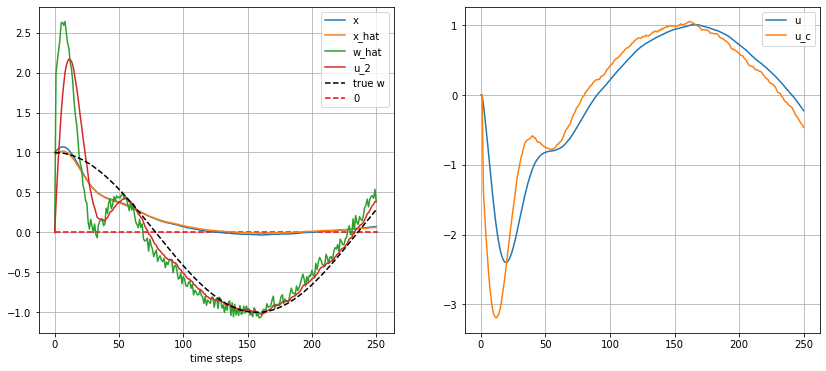

0.8187307530779818


In [48]:
l1 = L1(As=-2, T=5, dt=0.02, filter_co=10)
l1.process()
print(l1.alpha)

In [50]:
np.exp(-l1.dt*5)

0.9048374180359595